In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_iris_data = load_iris()
print(raw_iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
target_names = raw_iris_data.target_names[raw_iris_data.target]
iris_df = pd.DataFrame(raw_iris_data.data, columns=raw_iris_data.feature_names)
iris_df['target'] = raw_iris_data.target
iris_df['label'] = target_names

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0,0.5,'sepal length cm')

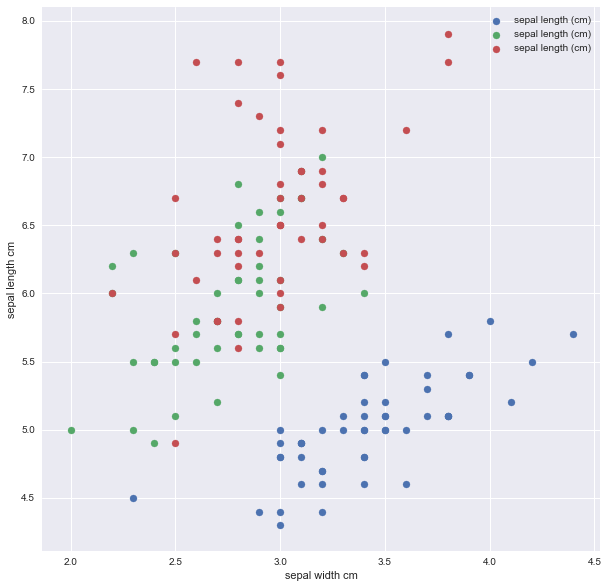

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(iris_df.target.unique(), ['r', 'g', 'b']):
    sub_df = iris_df.query('target == @target')
    ax.scatter(x=sub_df['sepal width (cm)'], y=sub_df['sepal length (cm)'])
ax.legend(loc='best')
ax.set_xlabel('sepal width cm')
ax.set_ylabel('sepal length cm')

Text(3.75,6.2,'versicolor')

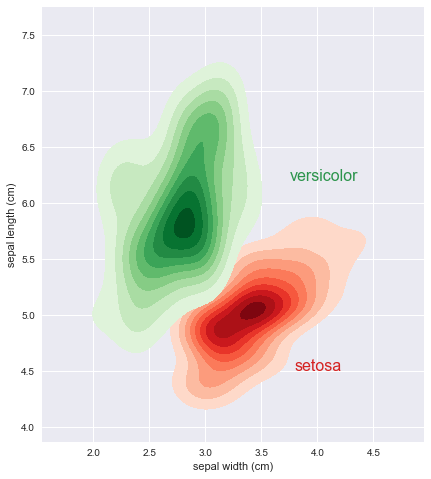

In [6]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris_df.query("label == 'setosa'")
virginica = iris_df.query("label == 'virginica'")
versicolor = iris_df.query("label == 'versicolor'")

# # Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plot
ax = sns.kdeplot(setosa['sepal width (cm)'], setosa['sepal length (cm)'],
                 cmap="Reds", shade=True, shade_lowest=False)
# ax = sns.kdeplot(virginica['sepal width (cm)'], virginica['sepal length (cm)'],
#                  cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor['sepal width (cm)'], versicolor['sepal length (cm)'],
                 cmap="Greens", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
# ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
ax.text(3.75, 6.2, "versicolor", size=16, color=green)